In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('/Users/swerve/Downloads/ML Reinforcement Project Files/ipl_matches.csv')

In [4]:
print(df.head())

   id    Season       city      date                        team1  \
0   1  IPL-2017  Hyderabad  05/04/17          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06/04/17               Mumbai Indians   
2   3  IPL-2017     Rajkot  07/04/17                Gujarat Lions   
3   4  IPL-2017     Indore  08/04/17       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08/04/17  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [5]:
print(df.shape)

(756, 18)


In [6]:
print(df.tail())

        id    Season           city      date                  team1  \
751  11347  IPL-2019         Mumbai  05/05/19  Kolkata Knight Riders   
752  11412  IPL-2019        Chennai  07/05/19    Chennai Super Kings   
753  11413  IPL-2019  Visakhapatnam  08/05/19    Sunrisers Hyderabad   
754  11414  IPL-2019  Visakhapatnam  10/05/19         Delhi Capitals   
755  11415  IPL-2019      Hyderabad  12/05/19         Mumbai Indians   

                   team2          toss_winner toss_decision  result  \
751       Mumbai Indians       Mumbai Indians         field  normal   
752       Mumbai Indians  Chennai Super Kings           bat  normal   
753       Delhi Capitals       Delhi Capitals         field  normal   
754  Chennai Super Kings  Chennai Super Kings         field  normal   
755  Chennai Super Kings       Mumbai Indians           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
751           0       Mumbai Indians            0               9   
75

In [7]:
df.sample(5,random_state=42)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
408,409,IPL-2013,Chandigarh,21/04/13,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,DA Miller,"Punjab Cricket Association Stadium, Mohali",M Erasmus,K Srinath,NaN
97,98,IPL-2008,Delhi,15/05/08,Delhi Daredevils,Deccan Chargers,Deccan Chargers,field,normal,0,Delhi Daredevils,12,0,A Mishra,Feroz Shah Kotla,BG Jerling,GA Pratapkumar,NaN
424,425,IPL-2013,Chennai,02/05/13,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,15,0,SK Raina,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN
584,585,IPL-2016,Mumbai,16/04/16,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,3,AJ Finch,Wankhede Stadium,HDPK Dharmasena,VK Sharma,NaN
603,604,IPL-2016,Rajkot,01/05/16,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Kings XI Punjab,23,0,AR Patel,Saurashtra Cricket Association Stadium,BNJ Oxenford,VK Sharma,NaN


In [8]:
df = df.drop(columns='umpire3')
print('Missing Values')
print(df.isnull().sum())

Missing Values
id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64


In [9]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [10]:
df.columns = [c.strip().lower().replace(' ','_') for c in df.columns]
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
cat_cols = ['season','city','team1','team2','toss_winner','toss_decision','result','winner','player_of_match','venue','umpire1','umpire2','umpire3']
cat_cols

['season',
 'city',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [12]:
for c in cat_cols:
    if c in df.columns:
        print(f'{c} : {df[c].nunique()} unique')

season : 12 unique
city : 32 unique
team1 : 15 unique
team2 : 15 unique
toss_winner : 15 unique
toss_decision : 2 unique
result : 3 unique
winner : 15 unique
player_of_match : 226 unique
venue : 41 unique
umpire1 : 61 unique
umpire2 : 65 unique


In [13]:
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

df.dtypes
before = len(df)
before

756

In [14]:
df = df.dropna(subset=['winner'])
after = len(df)
after

756

In [15]:
print(f" Dropped {after - before} rows due to missing winner, Shape : {df.shape}")

 Dropped 0 rows due to missing winner, Shape : (756, 17)


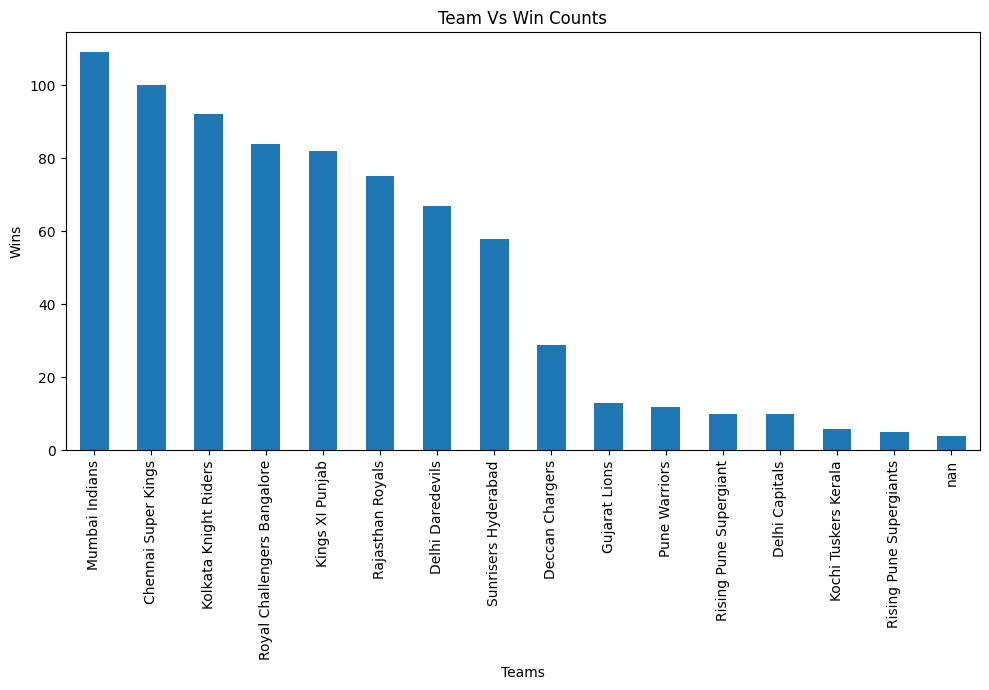

In [16]:
def bar_plot(series, title,xlabel,ylabel,rotation=90):
    counts = series.value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10,7))
    counts.plot(kind='bar')
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

bar_plot(df['winner'],"Team Vs Win Counts","Teams","Wins")

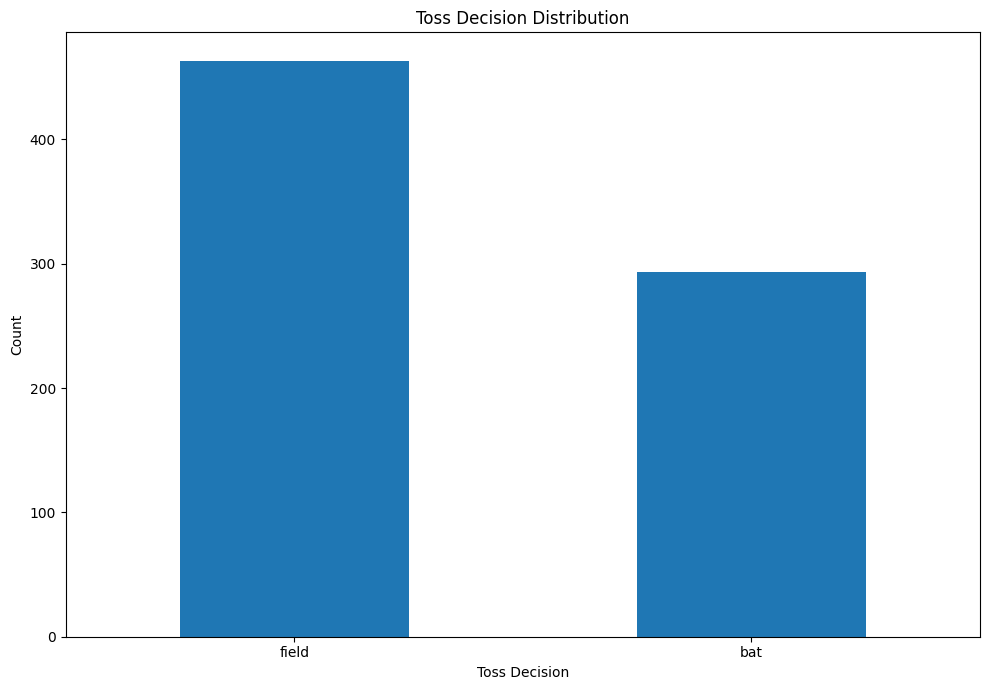

In [17]:
bar_plot(df['toss_decision'],"Toss Decision Distribution","Toss Decision","Count",0)

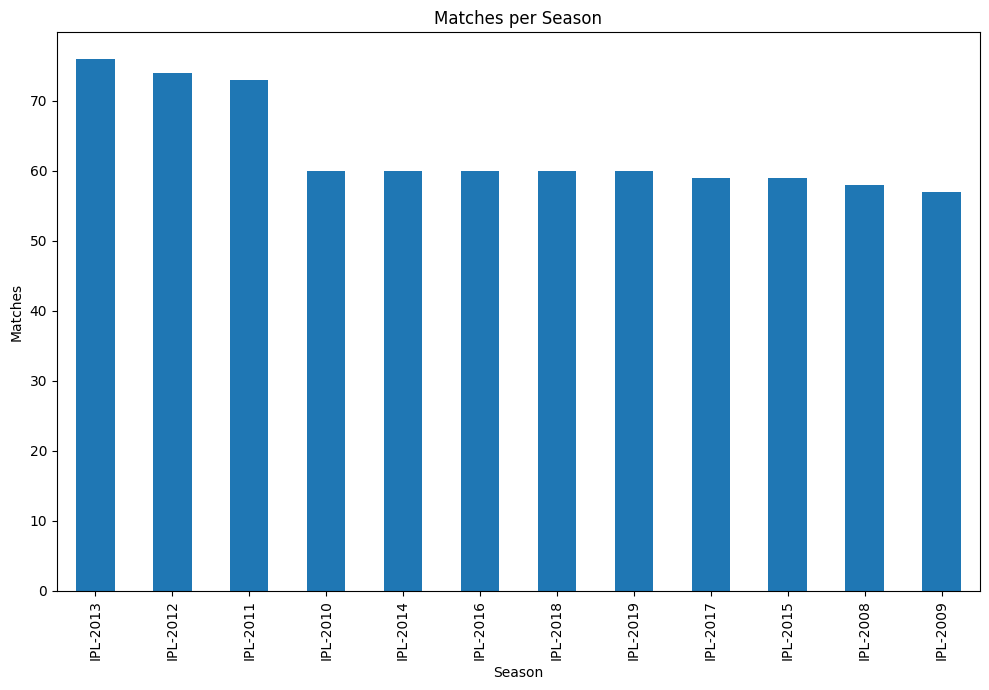

In [18]:
bar_plot(df['season'],"Matches per Season","Season","Matches",90)

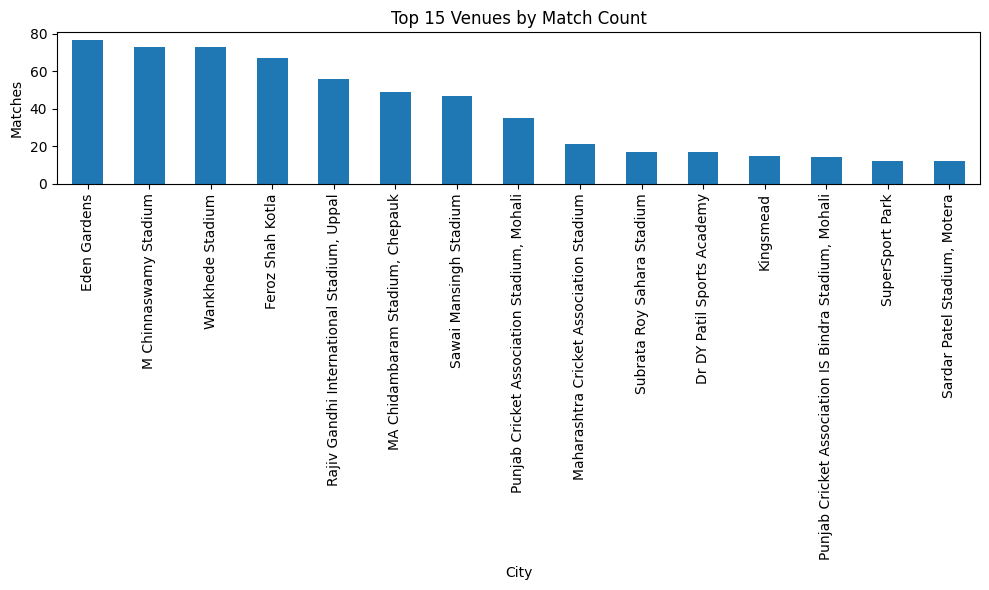

In [19]:
plt.figure(figsize=(10,6))
df['venue'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Venues by Match Count")
plt.xlabel("City")
plt.ylabel("Matches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

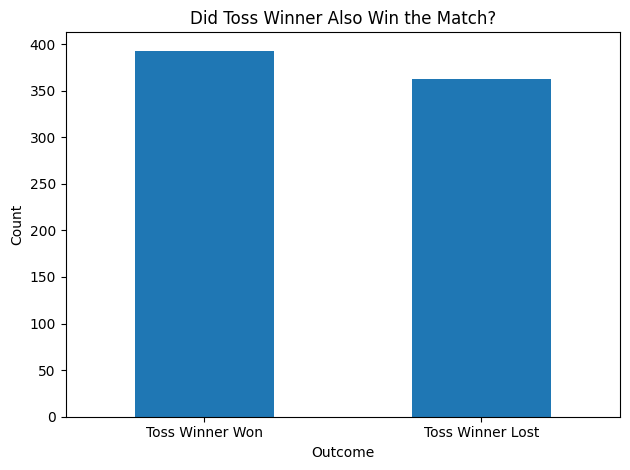

In [20]:
df['toss_win_match_win'] = (df['toss_winner'] == df['winner']).astype(int)
plt.figure()
df['toss_win_match_win'].value_counts().rename({0: "Toss Winner Lost", 1: "Toss Winner Won"}).plot(kind='bar')
plt.title("Did Toss Winner Also Win the Match?")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


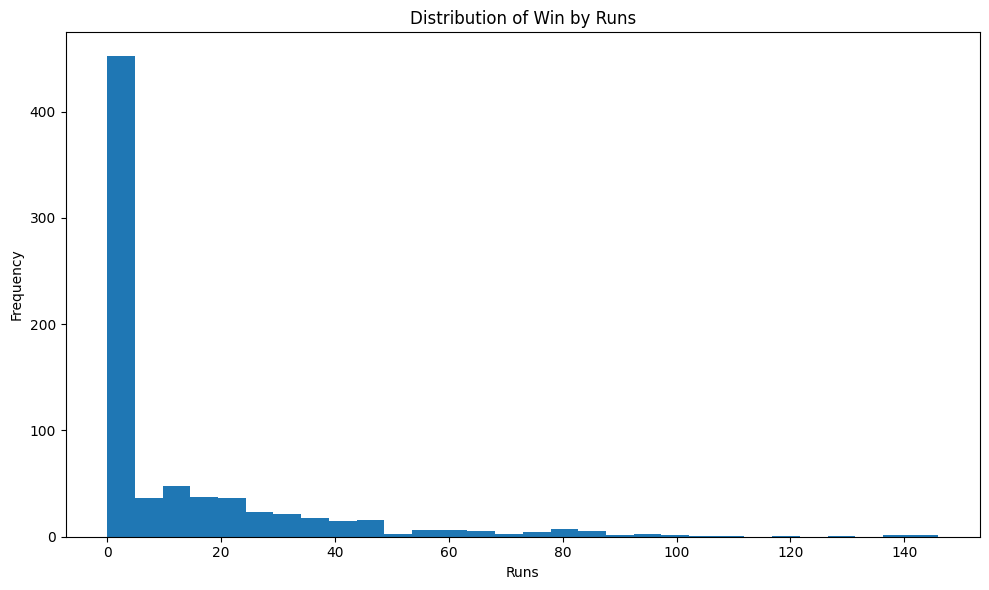

In [21]:
plt.figure(figsize=(10,6))
df['win_by_runs'].fillna(0).plot(kind='hist',bins=30)
plt.title('Distribution of Win by Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

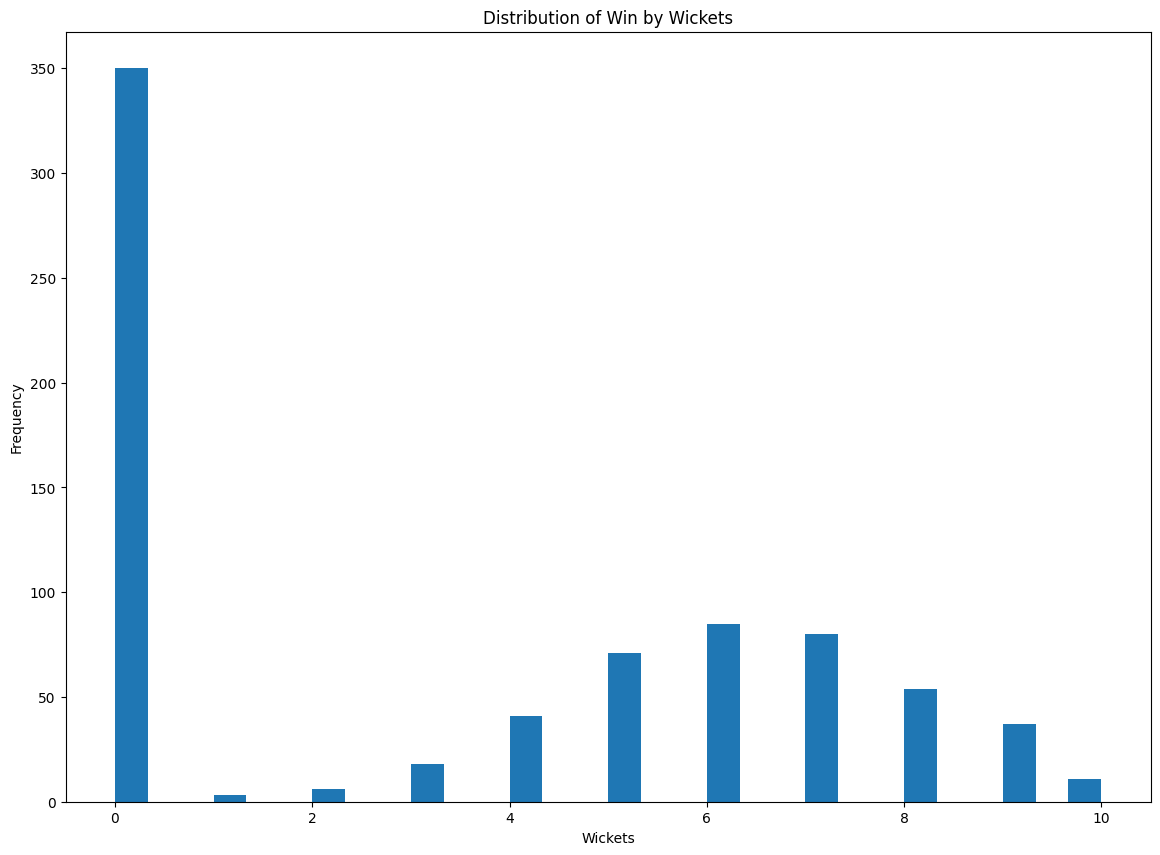

In [22]:
plt.figure(figsize=(14,10))
df['win_by_wickets'].fillna(0).plot(kind='hist',bins=30)
plt.title('Distribution of Win by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

In [23]:
df.winner.value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
nan                              4
Name: count, dtype: int64

In [24]:
team_name_corrections = {
    "Rising Pune Supergiant": "Rising Pune Supergiants",
    "Pune Warriors": "Rising Pune Supergiants",
    "Delhi Daredevils": "Delhi Capitals"
}

df['winner'] = df['winner'].replace(team_name_corrections)
df['team1'] = df['team1'].replace(team_name_corrections)
df['team2'] = df['team2'].replace(team_name_corrections)
df['toss_winner'] = df['toss_winner'].replace(team_name_corrections)


In [25]:


from sklearn.preprocessing import LabelEncoder
df = df.dropna(subset=["winner"])
le = LabelEncoder()
y = le.fit_transform(df["winner"]) 
X = df.drop(columns='winner')

In [26]:
X

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_win_match_win
0,1,IPL-2017,Hyderabad,05/04/17,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,IPL-2017,Pune,06/04/17,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,1
2,3,IPL-2017,Rajkot,07/04/17,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,1
3,4,IPL-2017,Indore,08/04/17,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,1
4,5,IPL-2017,Bangalore,08/04/17,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,15,0,KM Jadhav,M Chinnaswamy Stadium,nan,nan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,1
752,11412,IPL-2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,0
753,11413,IPL-2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,0,2,RR Pant,ACA-VDCA Stadium,nan,nan,1
754,11414,IPL-2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,1


In [27]:
numerical_cols = X.select_dtypes(include=[np.number]).columns.to_list()
numerical_cols

['id', 'dl_applied', 'win_by_runs', 'win_by_wickets', 'toss_win_match_win']

In [28]:
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.to_list()
categorical_cols

['season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2']

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
ohe = OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False)

In [31]:
X_cat = ohe.fit_transform(X[categorical_cols])
X_num = X[numerical_cols].to_numpy()

X_encoded = np.concatenate([X_cat,X_num],axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (604, 1021)  Test shape: (152, 1021)


In [34]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

    print(f"{model_name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

    return {
        "name": model_name,
        "model": model,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "cm": cm
    }


models = [
    ("Logistic Regression", LogisticRegression(max_iter=500)),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier(n_neighbors=11)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"))
]

results = []
for name, clf in models:
    res = evaluate_model(clf, X_train, y_train, X_test, y_test, name)
    results.append(res)


results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values("f1", ascending=False))


Logistic Regression
Accuracy : 0.2303
Precision: 0.1182
Recall   : 0.1460
F1-score : 0.1125

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.40      0.19        20
           1       0.00      0.00      0.00         6
           2       0.43      0.20      0.27        15
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         1
           6       0.26      0.74      0.38        19
           7       0.22      0.09      0.13        22
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         5
          10       0.50      0.47      0.48        17
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         1

    accuracy                           0.23       152
   macro avg       0.12      0.15      0.11       152
weighted avg      

In [35]:
results_df

,name,model,accuracy,precision,recall,f1,cm
0,Logistic Regression,LogisticRegression(max_iter=500),0.230263,0.118234,0.146026,0.112534,"[[8, 0, 1, 0, 0, 0, 6, 1, 0, 0, 2, 2, 0], [4, ..."
1,SVM,SVC(),0.157895,0.033126,0.085315,0.037330,"[[4, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0], [0,..."
2,KNN,KNeighborsClassifier(n_neighbors=11),0.065789,0.056189,0.052016,0.052738,"[[2, 0, 3, 0, 3, 1, 3, 3, 3, 0, 2, 0, 0], [2, ..."
3,Decision Tree,DecisionTreeClassifier(random_state=42),0.822368,0.684699,0.673520,0.668677,"[[18, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1,..."
4,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.822368,0.710081,0.696099,0.696352,"[[15, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0], [0,..."
5,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.967105,0.809605,0.834615,0.819566,"[[17, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], [0,..."


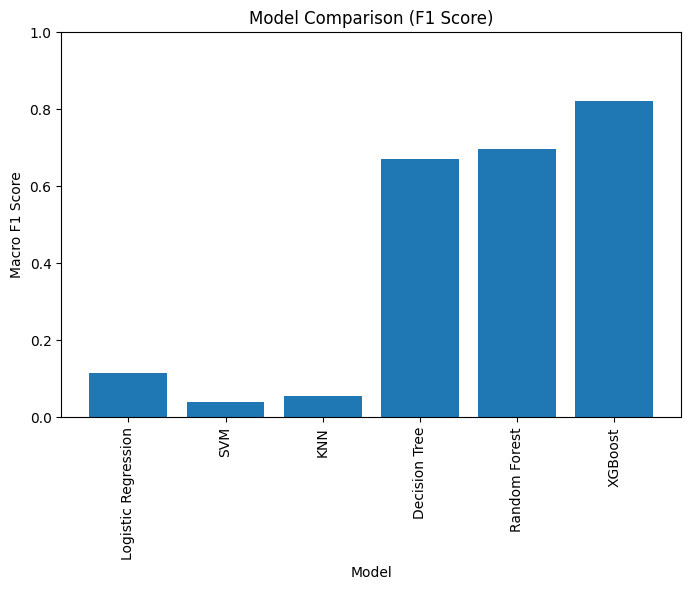

In [36]:
plt.figure(figsize=(8,5))
plt.bar(results_df["name"], results_df["f1"])
plt.title("Model Comparison (F1 Score)")
plt.ylabel("Macro F1 Score")
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylim(0, 1)  # scores are between 0 and 1
plt.show()

In [37]:
best_entry = max(results, key=lambda d: d['f1'])
best_name = best_entry['name']
best_model = best_entry['model']
print("Best model:", best_name)

Best model: XGBoost


In [53]:
param_distributions = {
    'n_estimators': [200, 300, 400],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2]
}
search = RandomizedSearchCV(
        estimator=best_model,
        param_distributions=param_distributions,
        n_iter=15,
        scoring='f1_macro',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
search.fit(X_train, y_train)
tuned_model = search.best_estimator_
print("Best params:", search.best_params_)
print("Best CV score (f1_macro):", search.best_score_)
    
    # Evaluate tuned model on test
tuned_pred = tuned_model.predict(X_test)
print("\nTuned Model with Test data")
print("Accuracy :", accuracy_score(y_test, tuned_pred))
print("Precision:", precision_score(y_test, tuned_pred, average='macro'))
print("Recall   :", recall_score(y_test, tuned_pred, average='macro'))
print("F1-score :", f1_score(y_test, tuned_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, tuned_pred))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.1}
Best CV score (f1_macro): 0.4478261401126617

Tuned Model with Test data
Accuracy : 0.5394736842105263
Precision: 0.5577223389355742
Recall   : 0.48001009281969026
F1-score : 0.48581202307917853

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55        26
           1       0.50      0.29      0.36         7
           2       0.31      0.50      0.38        10
           3       1.00      0.75      0.86         4
           4       0.43      0.53      0.47        17
           5       0.00      0.00      0.00         0
           6       0.60      0.55      0.57        22
           7       0.56      0.74      0.64        19
           8       0.71      0.86      0.77        14
           9       1.00      0.22      0.36         9
          10       0.47      0.58      0.52        1

In [45]:
team_mapping = pd.DataFrame({
    "Team": encoder.classes_,
    "Encoded_Label": range(len(encoder.classes_))
})

print(team_mapping)


                           Team  Encoded_Label
0           Chennai Super Kings              0
1               Deccan Chargers              1
2                Delhi Capitals              2
3                 Gujarat Lions              3
4               Kings XI Punjab              4
5          Kochi Tuskers Kerala              5
6         Kolkata Knight Riders              6
7                Mumbai Indians              7
8              Rajasthan Royals              8
9       Rising Pune Supergiants              9
10  Royal Challengers Bangalore             10
11          Sunrisers Hyderabad             11
12                          nan             12


In [47]:
encoder = LabelEncoder()
df_encoded = df.dropna(subset=["toss_decision"]).copy()
df_encoded["toss_encoded"] = encoder.fit_transform(df_encoded["toss_decision"])

toss_mapping = pd.DataFrame({
    "Toss_Decision": encoder.classes_,
    "Encoded_Label": range(len(encoder.classes_))
})

print(toss_mapping)

  Toss_Decision  Encoded_Label
0           bat              0
1         field              1


In [39]:
import pickle

# Select features and target
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
target = 'winner'

# Prepare dataframe
df_model = df[features + [target]].dropna()

# Encode categorical variables
encoder = LabelEncoder()
for col in features + [target]:
    df_model[col] = encoder.fit_transform(df_model[col])

X = df_model[features]
y = df_model[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tuned_model.fit(X_train, y_train)
# Save model to pickle
with open("ipl_winner_xgb.pkl", "wb") as f:
    pickle.dump(tuned_model, f)

# Load model back
with open("ipl_winner_xgb.pkl", "rb") as f:
    loaded_xgb = pickle.load(f)

# Example prediction
sample = X_test.iloc[0:5]   # first 5 test samples
print("Predictions:", loaded_xgb.predict(sample))
y_pred = loaded_xgb.predict(sample)
print("Actual:", y_test.iloc[0:5].values)

predicted_teams = encoder.inverse_transform(y_pred)
actual_teams = encoder.inverse_transform(y_test.iloc[0:5])

print("Predictions:", predicted_teams)
y_pred = loaded_xgb.predict(sample)
print("Actual:", actual_teams)

Predictions: [4 1 0 7 4]
Actual: [4 2 0 3 4]
Predictions: ['Kings XI Punjab' 'Deccan Chargers' 'Chennai Super Kings'
 'Mumbai Indians' 'Kings XI Punjab']
Actual: ['Kings XI Punjab' 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Lions'
 'Kings XI Punjab']
